In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Capstone Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import io
data=pd.read_csv("RyanairFlights.csv",encoding="latin1")
data.head(2)

,Booking Date,Date,Route Origin Airport,Route Origin Name,Origin_Airport Name,Origin_City,Origin_Country,Origin_Airport Code,Origin_ICAO Code,Origin_Latitude,Origin_Longitude,Origin_Altitude,Origin_Timezone,Route Destination Airport,Route Destination Name,Destination_Airport Name,Destination_City,Destination_Country,Destination_Airport Code,Destination_ICAO Code,Destination_Latitude,Destination_Longitude,Destination_Altitude,Destination_Timezone,Flight Key,Flight Duration,Fare Key,Departure Time,Arrival Time,Fare Class,Fare Type,Fare Currency,Fare Amount,Fare Published,Fare Discounted,Fare Discount Pct,Fare Has Promo,Segment Number,Segment Flight Number,Segment Origin,Segment Destination,Segment Duration,Segment Distance (km),Segment Origin Time - Local,Segment Origin Time - UTC,Segment Destination Time - Local,Segment Destination Time - UTC,Request Time UTC
0,05-11-2017,20180102,STN,London (Stansted),London Stansted Airport,London,United Kingdom,STN,EGSS,51.884998,0.235,348,airport,AAL,Aalborg Airport,Aalborg Airport,Aalborg,Denmark,AAL,EKYT,57.092759,9.849243,10,airport,FR~2205~ ~~STN~01/02/2018 06:50~AAL~01/02/2018...,01:40,0~K~~KZ6LOW~BND6~~2~X,06:50:00,09:30:00,K,ADT,GBP,68.99,68.99,False,0.0,False,0,FR 2205,STN,AAL,01:40,849.585165,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13
1,05-11-2017,20180104,STN,London (Stansted),London Stansted Airport,London,United Kingdom,STN,EGSS,51.884998,0.235,348,airport,AAL,Aalborg Airport,Aalborg Airport,Aalborg,Denmark,AAL,EKYT,57.092759,9.849243,10,airport,FR~2205~ ~~STN~01/04/2018 06:50~AAL~01/04/2018...,01:40,0~T~~TLDISX2~ZZZV~~2~X,06:50:00,09:30:00,T,ADT,GBP,22.49,24.99,True,10.0,False,0,FR 2205,STN,AAL,01:40,849.585165,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13


In [4]:
data.columns

Index(['Booking Date', 'Date', 'Route Origin Airport', 'Route Origin Name',
       'Origin_Airport Name', 'Origin_City', 'Origin_Country',
       'Origin_Airport Code', 'Origin_ICAO Code', 'Origin_Latitude',
       'Origin_Longitude', 'Origin_Altitude', 'Origin_Timezone',
       'Route Destination Airport', 'Route Destination Name',
       'Destination_Airport Name', 'Destination_City', 'Destination_Country',
       'Destination_Airport Code', 'Destination_ICAO Code',
       'Destination_Latitude', 'Destination_Longitude', 'Destination_Altitude',
       'Destination_Timezone', 'Flight Key', 'Flight Duration', 'Fare Key',
       'Departure Time', 'Arrival Time', 'Fare Class', 'Fare Type',
       'Fare Currency', 'Fare Amount', 'Fare Published', 'Fare Discounted',
       'Fare Discount Pct', 'Fare Has Promo', 'Segment Number',
       'Segment Flight Number', 'Segment Origin', 'Segment Destination',
       'Segment Duration', 'Segment Distance (km)',
       'Segment Origin Time - Local', 

In [5]:
data.shape

(725775, 48)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725775 entries, 0 to 725774
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Booking Date                      725775 non-null  object 
 1   Date                              725775 non-null  int64  
 2   Route Origin Airport              725775 non-null  object 
 3   Route Origin Name                 725775 non-null  object 
 4   Origin_Airport Name               725775 non-null  object 
 5   Origin_City                       725775 non-null  object 
 6   Origin_Country                    725775 non-null  object 
 7   Origin_Airport Code               725775 non-null  object 
 8   Origin_ICAO Code                  725775 non-null  object 
 9   Origin_Latitude                   725775 non-null  float64
 10  Origin_Longitude                  725775 non-null  float64
 11  Origin_Altitude                   725775 non-null  i

In [7]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Booking Date', 'Route Origin Airport', 'Route Origin Name', 'Origin_Airport Name', 'Origin_City', 'Origin_Country', 'Origin_Airport Code', 'Origin_ICAO Code', 'Origin_Timezone', 'Route Destination Airport', 'Route Destination Name', 'Destination_Airport Name', 'Destination_City', 'Destination_Country', 'Destination_Airport Code', 'Destination_ICAO Code', 'Destination_Timezone', 'Flight Key', 'Flight Duration', 'Fare Key', 'Departure Time', 'Arrival Time', 'Fare Class', 'Fare Type', 'Fare Currency', 'Fare Discounted', 'Fare Has Promo', 'Segment Flight Number', 'Segment Origin', 'Segment Destination', 'Segment Duration']
['Date', 'Origin_Latitude', 'Origin_Longitude', 'Origin_Altitude', 'Destination_Latitude', 'Destination_Longitude', 'Destination_Altitude', 'Fare Amount', 'Fare Published', 'Fare Discount Pct', 'Segment Number', 'Segment Distance (km)', 'Segment Origin Time - Local', 'Segment Origin Time - UTC', 'Segment Destination Time - Local', 'Segment Destination Time - UTC', 'Req

In [8]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Date,725775.0,2.017939e+07,3147.503484,2.017111e+07,2.018022e+07,2.018052e+07,2.018081e+07,2.018103e+07
Origin_Latitude,725775.0,4.611488e+01,6.898541,2.793190e+01,4.063210e+01,4.567390e+01,5.188500e+01,6.141410e+01
Origin_Longitude,725775.0,4.963758e+00,9.879338,-2.709080e+01,-2.274950e+00,2.760550e+00,1.235190e+01,3.493580e+01
Origin_Altitude,725775.0,3.857741e+02,447.430705,-1.100000e+01,8.000000e+01,2.570000e+02,4.270000e+02,2.776000e+03
Destination_Latitude,725775.0,4.614588e+01,6.896316,2.793190e+01,4.065760e+01,4.567390e+01,5.188500e+01,6.141410e+01
Destination_Longitude,725775.0,4.996769e+00,9.872733,-2.709080e+01,-2.274950e+00,2.760550e+00,1.235190e+01,3.493580e+01
Destination_Altitude,725775.0,3.848736e+02,446.586441,-1.100000e+01,7.800000e+01,2.570000e+02,4.270000e+02,2.776000e+03
Fare Amount,706459.0,2.605245e+02,2030.699935,2.990000e+00,2.879000e+01,4.499000e+01,7.899000e+01,9.393900e+04
Fare Published,706459.0,2.646627e+02,2048.706724,2.990000e+00,2.899000e+01,4.599000e+01,7.999000e+01,9.393900e+04
Fare Discount Pct,706459.0,1.527321e+00,5.049508,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


In [9]:
data[cat].describe().T

,count,unique,top,freq
Booking Date,725775,1,05-11-2017,725775
Route Origin Airport,725775,206,STN,60186
Route Origin Name,725775,206,London (Stansted),60186
Origin_Airport Name,725775,206,London Stansted Airport,60186
Origin_City,725775,201,London,69336
Origin_Country,725775,32,Italy,138121
Origin_Airport Code,725775,206,STN,60186
Origin_ICAO Code,725775,206,EGSS,60186
Origin_Timezone,725775,1,airport,725775
Route Destination Airport,725775,206,STN,59484


In [10]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Booking Date,Date,Route Origin Airport,Route Origin Name,Origin_Airport Name,Origin_City,Origin_Country,Origin_Airport Code,Origin_ICAO Code,Origin_Latitude,Origin_Longitude,Origin_Altitude,Origin_Timezone,Route Destination Airport,Route Destination Name,Destination_Airport Name,Destination_City,Destination_Country,Destination_Airport Code,Destination_ICAO Code,Destination_Latitude,Destination_Longitude,Destination_Altitude,Destination_Timezone,Flight Key,Flight Duration,Fare Key,Departure Time,Arrival Time,Fare Class,Fare Type,Fare Currency,Fare Amount,Fare Published,Fare Discounted,Fare Discount Pct,Fare Has Promo,Segment Number,Segment Flight Number,Segment Origin,Segment Destination,Segment Duration,Segment Distance (km),Segment Origin Time - Local,Segment Origin Time - UTC,Segment Destination Time - Local,Segment Destination Time - UTC,Request Time UTC


In [11]:
print('**Total datapoints of null values in the data**:',19316)
print('**Total percentage of null values in the data**:',(19316/725775)*100)
print(data.isnull().sum())

**Total datapoints of null values in the data**: 19316
**Total percentage of null values in the data**: 2.6614308842272054
Booking Date                            0
Date                                    0
Route Origin Airport                    0
Route Origin Name                       0
Origin_Airport Name                     0
Origin_City                             0
Origin_Country                          0
Origin_Airport Code                     0
Origin_ICAO Code                        0
Origin_Latitude                         0
Origin_Longitude                        0
Origin_Altitude                         0
Origin_Timezone                         0
Route Destination Airport               0
Route Destination Name                  0
Destination_Airport Name                0
Destination_City                        0
Destination_Country                     0
Destination_Airport Code                0
Destination_ICAO Code                   0
Destination_Latitude                 

### As we are having only 2.66% of the datapoints as our outlier from 7 lakh rows, it will not affect the prediction model so we are removing the NAN values from the data

In [12]:
data=data.dropna(axis=0)

In [13]:
data.shape

(706459, 48)

## **FEATURE** **SELECTION**

In [14]:
a1=(((data['Fare Discount Pct'].value_counts())/len(data))*100).cumsum()
a2=(((data['Fare Discounted'].value_counts())/len(data))*100).cumsum()
print('Percentage of each classes in the Fare Discount Pct feature:\n',a1)
print('Percentage of each classes in the Fare Discount feature:\n',a2)


Percentage of each classes in the Fare Discount Pct feature:
 0.0      91.005281
20.0     97.283777
10.0    100.000000
Name: Fare Discount Pct, dtype: float64
Percentage of each classes in the Fare Discount feature:
 False     91.005281
True     100.000000
Name: Fare Discounted, dtype: float64


In [15]:
data.groupby('Origin_City')['Origin_Airport Name'].value_counts()

Origin_City  Origin_Airport Name        
Aalborg      Aalborg Airport                 201
Aarhus       Aarhus Airport                  413
Aberdeen     Aberdeen Dyce Airport           327
Agadir       Al Massira Airport              348
Alghero      Alghero-Fertilia Airport       1226
                                            ... 
Warsaw       Warsaw Chopin Airport           331
Weeze        Weeze Airport                  4887
Wroclaw      Copernicus WrocÅaw Airport    4087
Zadar        Zemunik Airport                 936
Zaragoza     Zaragoza Air Base               579
Name: Origin_Airport Name, Length: 206, dtype: int64

In [16]:
data['Flight Key'].value_counts()

FR~4068~ ~~SXF~06/12/2018 12:40~TFS~06/12/2018 16:55~    1
FR~8817~ ~~FNI~08/08/2018 12:35~STN~08/08/2018 13:30~    1
FR~6266~ ~~EDI~07/08/2018 07:00~BCN~07/08/2018 10:50~    1
FR~5468~ ~~MAD~05/16/2018 10:30~FUE~05/16/2018 12:25~    1
FR~6451~ ~~BGY~04/05/2018 08:40~PMO~04/05/2018 10:25~    1
                                                        ..
FR~6045~ ~~NDR~01/27/2018 09:55~CRL~01/27/2018 14:00~    1
FR~6384~ ~~BCN~04/08/2018 11:15~SDR~04/08/2018 12:45~    1
FR~4091~ ~~BUD~06/18/2018 19:30~PRG~06/18/2018 20:40~    1
FR~9156~ ~~SDR~02/19/2018 15:40~CIA~02/19/2018 17:55~    1
FR~ 321~ ~~CAG~05/01/2018 14:00~VRN~05/01/2018 15:50~    1
Name: Flight Key, Length: 706459, dtype: int64

In [17]:
data['Fare Key'].value_counts()

0~T~~TZ5LOW~BND5~~1~X                         10150
0~T~~TZ5LOW~BND5~~2~X                          7815
0~T~~TZ6LOW~BND6~~2~X                          7156
0~W~~WZ5LOW~BND5~~1~X                          6766
0~T~~TZ6LOW~BND6~~1~X                          6374
                                              ...  
0~Q~~Q13HIGH~BO13~~7~X                            1
0~V~~V9HIGH~BND9~~7~X                             1
0~H~~HHDIS~ZZZY~~11~X                             1
0~Q~~Q9HIGH~BND9~~11~X                            1
2~H~~HZ6LOW~BND6~~1~X^1~E~~E8HIGH~BND8~~4~        1
Name: Fare Key, Length: 3087, dtype: int64

In [18]:
print(data['Origin_Timezone'].value_counts())
print(data['Destination_Timezone'].value_counts())

airport    706459
Name: Origin_Timezone, dtype: int64
airport    706459
Name: Destination_Timezone, dtype: int64


***Inferences on Dropping the columns***

a.Fare Discount Pct and Fare Discounted : Columns are dropped because we are having around 91% of the rows as 0, so it will contribute well to our model

b.Destination_Airport Name/Destination_City/ICAO Destination/Route_Destination_Airport/segment destination , Origin_City/Origin_Airport Name/Route origin airport/ICAO origin airport/segement origin - both columns shares the same information so we are removing one column

c. Bookingdate and Request time UTC - shares the same info so dropping one column

d. segement origin time/segment origin time UTC/segment destination time local/segment destination time UTC/'Segment Flight Number'/'Segment Origin'/'Segment Destination'/'Segment Duration' - are droppedd because it  has  no meaning as Ryanair flight company doesnot  has  connecting flight services

e.'Destination_Latitude'/'Destination_Longitude'/'Destination_Altitude'/'originn_Latitude','origin_Longitude','originAltitude' - this information doesnot contribute information for our flightfare prediction purpose.

f.Flight Key -Best I can tell is that this is the closest thing to a unique key that Ryanair published about each flight. this column is dropped because it has unique values for each row so no information form this column

g. Fare Key  - it gives the unique values of the different fare ranges , so this column has the same informaton as of the dependent variable so we are dropping thhis column.

h. Origin_Timezone/Destination_Timezone -  have only constatnt value so we are dropping these columns


In [19]:
data.drop(['Fare Discount Pct','Destination_Airport Name','Fare Discounted','Origin_Airport Name','Origin_Timezone','Request Time UTC','Segment Number','Fare Has Promo','Fare Type','Destination_Timezone','Segment Destination Time - UTC','Segment Destination Time - Local','Segment Origin Time - Local','Segment Origin Time - UTC','Route Origin Airport','Route Origin Name','Origin_ICAO Code','Origin_Latitude','Origin_Longitude','Origin_Altitude','Destination_Airport Code','Destination_ICAO Code','Destination_Latitude','Destination_Longitude','Destination_Altitude','Route Destination Airport','Route Destination Name','Origin_Airport Code','Flight Key','Fare Key','Segment Flight Number','Segment Origin','Segment Destination','Segment Duration'],axis=1,inplace=True)

In [20]:
#Here we are taking onnly fare currency as EURO and dropping others for two things
#1. As EUR Currency  itsel is having around 71% of the datapoints in the column 
#2. For easing the computational process
data=data[data['Fare Currency']=='EUR'] # including only euro currrncy

In [21]:
data.drop(['Fare Currency'],axis=1,inplace =True)
# We are dropping the Fare currency column as it is  having only constant value as EUR

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504606 entries, 53 to 725753
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Booking Date           504606 non-null  object 
 1   Date                   504606 non-null  int64  
 2   Origin_City            504606 non-null  object 
 3   Origin_Country         504606 non-null  object 
 4   Destination_City       504606 non-null  object 
 5   Destination_Country    504606 non-null  object 
 6   Flight Duration        504606 non-null  object 
 7   Departure Time         504606 non-null  object 
 8   Arrival Time           504606 non-null  object 
 9   Fare Class             504606 non-null  object 
 10  Fare Amount            504606 non-null  float64
 11  Fare Published         504606 non-null  float64
 12  Segment Distance (km)  504606 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 53.9+ MB


In [23]:
# Change Date column from float format to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d') 
data.head(2)

,Booking Date,Date,Origin_City,Origin_Country,Destination_City,Destination_Country,Flight Duration,Departure Time,Arrival Time,Fare Class,Fare Amount,Fare Published,Segment Distance (km)
53,05-11-2017,2018-01-03,Malaga,Spain,Aberdeen,United Kingdom,03:35,06:45:00,09:20:00,L,130.99,130.99,2288.363401
54,05-11-2017,2018-01-06,Malaga,Spain,Aberdeen,United Kingdom,03:35,15:30:00,18:05:00,B,180.99,180.99,2288.363401


# **UNIVARIATE** **ANALYSIS**

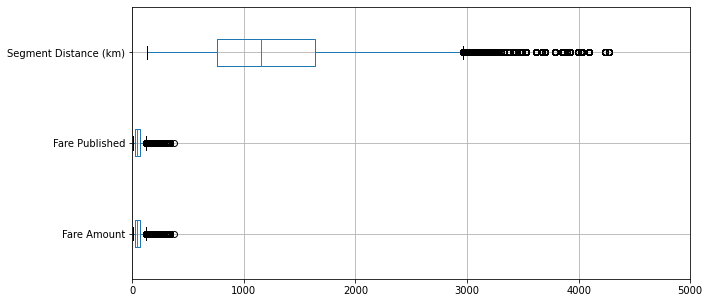

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
#data1=data
#data1.drop(['Date'],axis=1,inplace=True)
data.boxplot(vert=0)
plt.xlim(0,5000)
plt.show()

From the above output we can  see that there is outlier in so we  need to do outlier treatment to the variables

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
#median = float(df1['Segment Distance (km)'].median())
lr,ur=remove_outlier(data["Segment Distance (km)"])
data["Segment Distance (km)"]=np.where(data["Segment Distance (km)"]>ur,ur,data["Segment Distance (km)"])
data["Segment Distance (km)"]=np.where(data["Segment Distance (km)"]<lr,lr,data["Segment Distance (km)"])
lr,ur=remove_outlier(data["Fare Amount"])
data["Fare Amount"]=np.where(data["Fare Amount"]>ur,ur,data["Fare Amount"])
data["Fare Amount"]=np.where(data["Fare Amount"]<lr,lr,data["Fare Amount"])
lr,ur=remove_outlier(data["Fare Published"])
data["Fare Published"]=np.where(data["Fare Published"]>ur,ur,data["Fare Published"])
data["Fare Published"]=np.where(data["Fare Published"]<lr,lr,data["Fare Published"])
#lr,ur=remove_outlier(data["Fare Discount Pct"])
#data["Fare Discount Pct"]=np.where(data["Fare Discount Pct"]>ur,ur,data["Fare Discount Pct"])
#data["Fare Discount Pct"]=np.where(data["Fare Discount Pct"]<lr,lr,data["Fare Discount Pct"])

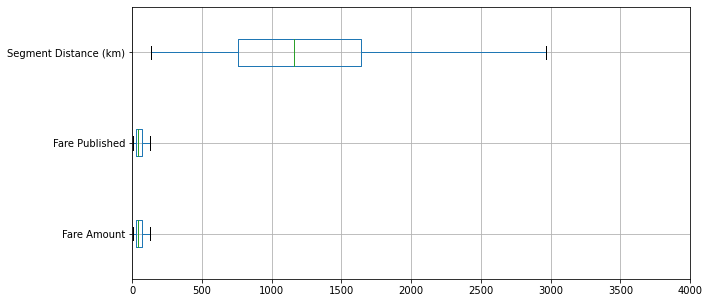

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data.boxplot(vert=0)
plt.xlim(0,4000)
plt.show()

From the above boxplot wecan find that the outlier is handled and there is  no outlier 

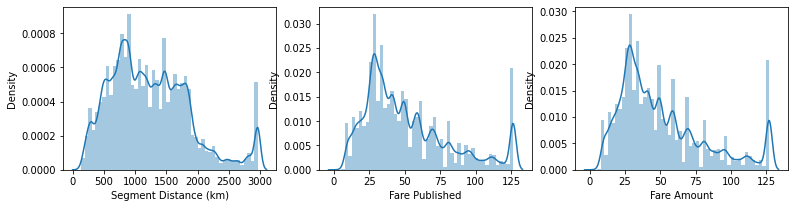

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(13,3)
a = sns.distplot(data['Segment Distance (km)'],ax=axes[0])
a = sns.distplot(data['Fare Published'] , ax=axes[1])
a = sns.distplot(data['Fare Amount'] , ax=axes[2])
plt.show()

#### So from the above distribution graph we can see that we have Right skwness in the features like Fare Amount and Fare Published , so we need to treat the two features and change it to normal distribution for model like Linear Regression

Italy      26.328660
Spain      51.582423
Germany    62.273933
Ireland    71.041763
Name: Origin_Country, dtype: float64


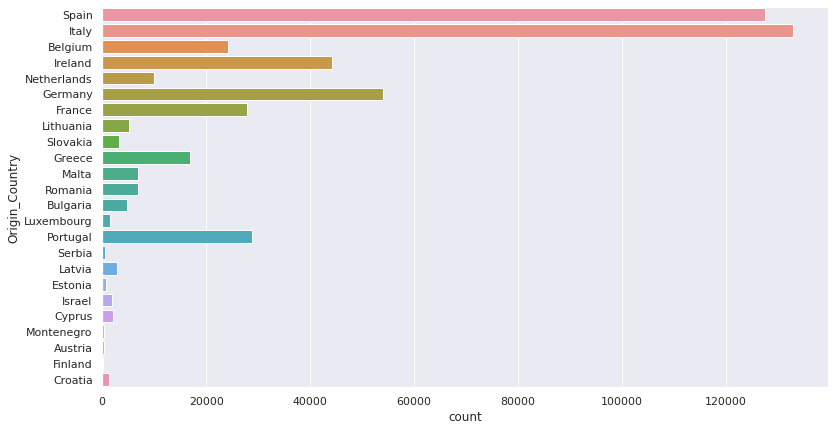

In [29]:
import seaborn as sns
plt.figure(figsize=(13,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Origin_Country", data=data)
print((((data['Origin_Country'].value_counts())/len(data))*100).cumsum().head(4))

Italy             22.105762
United Kingdom    41.941634
Spain             58.770209
Germany           66.986520
Name: Destination_Country, dtype: float64


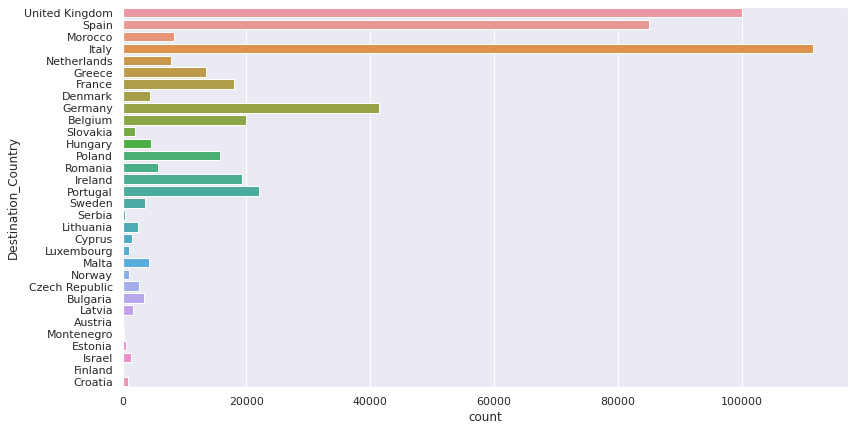

In [30]:
import seaborn as sns
plt.figure(figsize=(13,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Destination_Country", data=data)
print((((data['Destination_Country'].value_counts())/len(data))*100).cumsum().head(4))

T    18.801005
W    32.410039
A    44.560310
H    56.105952
C    66.482761
N    75.953913
V    83.687867
Name: Fare Class, dtype: float64


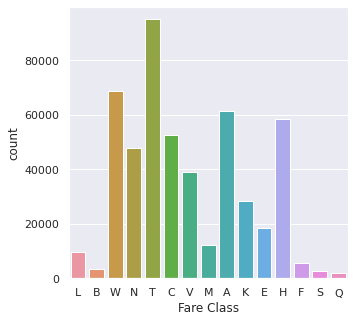

In [31]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Fare Class", data=data)
print((((data['Fare Class'].value_counts())/len(data))*100).cumsum().head(7))

Dublin       37127
Bergamo      28504
Rome         22942
Barcelona    21539
Madrid       18924
Name: Origin_City, dtype: int64


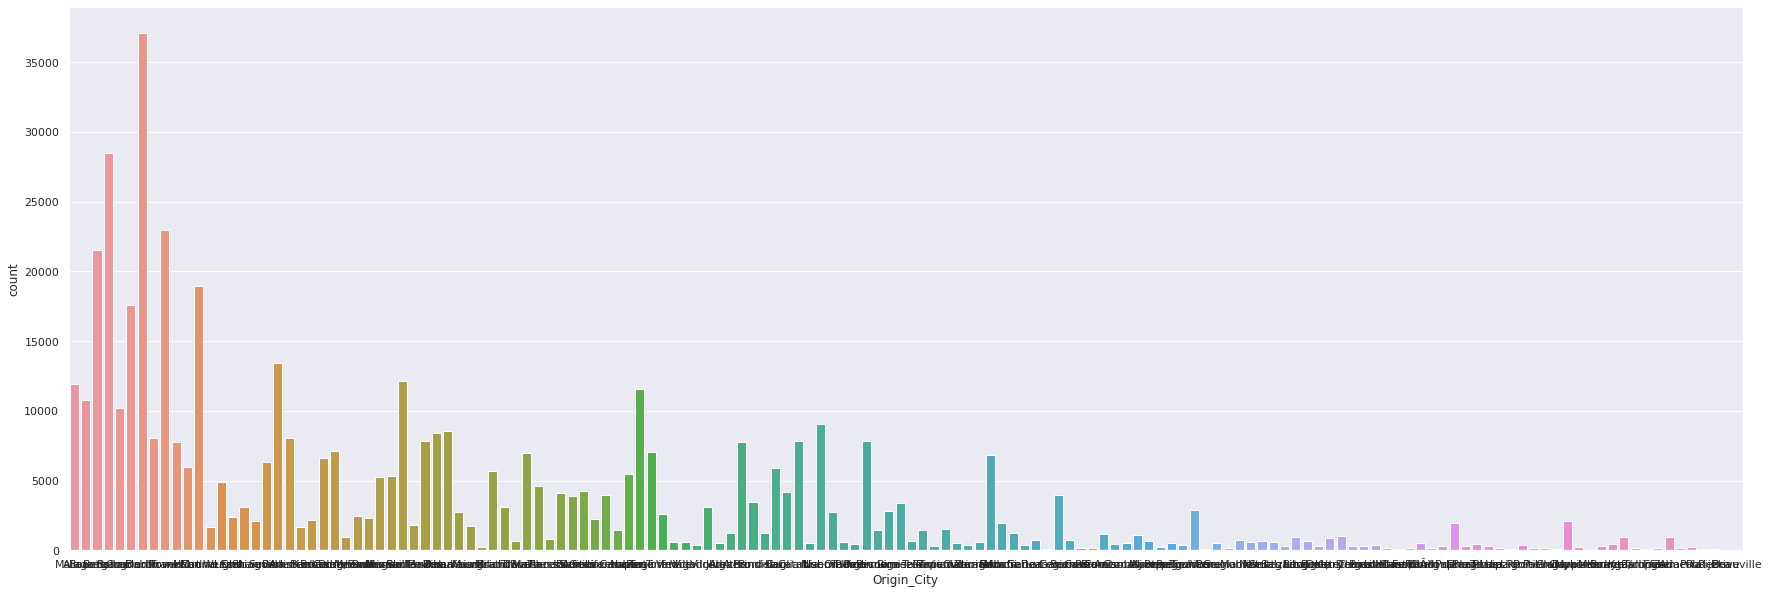

In [32]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Origin_City", data=data)
#print((((data['Origin_City'].value_counts())/len(data))*100).cumsum().head(10))
print(data['Origin_City'].value_counts().head(5))

London       49806
Bergamo      22824
Rome         18453
Dublin       17433
Barcelona    15954
Name: Destination_City, dtype: int64


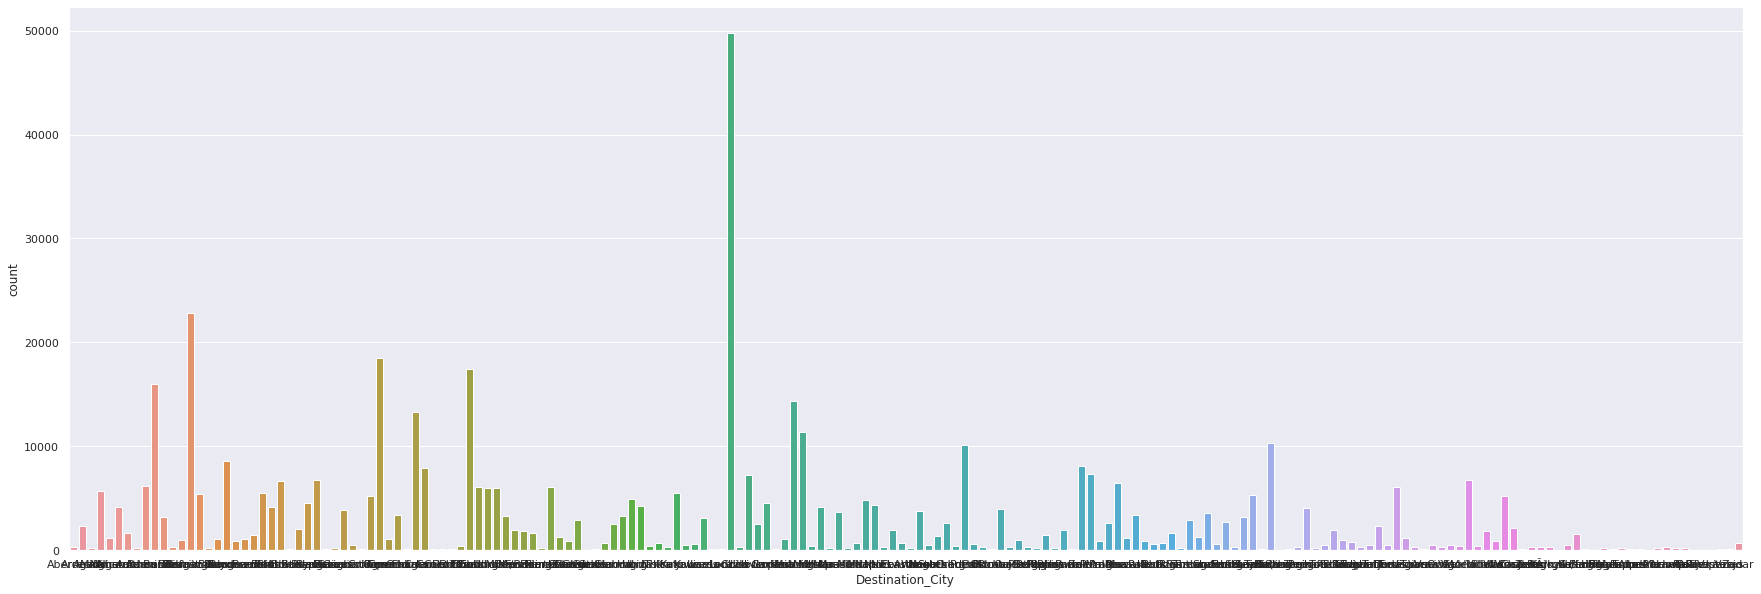

In [33]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Destination_City", data=data)
#print((((data['Destination_City'].value_counts())/len(data))*100).cumsum().head(10))
print(data['Destination_City'].value_counts().head(5))

**Univariate Analysis**

*Chi 2 test for testig the independence of categorical variables*

In [34]:
df=data[['Origin_City', 'Origin_Country','Destination_City', 'Destination_Country','Fare Class','Fare Amount']]
df.head()

,Origin_City,Origin_Country,Destination_City,Destination_Country,Fare Class,Fare Amount
53,Malaga,Spain,Aberdeen,United Kingdom,L,127.09
54,Malaga,Spain,Aberdeen,United Kingdom,B,127.09
55,Malaga,Spain,Aberdeen,United Kingdom,W,30.39
56,Malaga,Spain,Aberdeen,United Kingdom,N,14.99
57,Malaga,Spain,Aberdeen,United Kingdom,N,12.99


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504606 entries, 53 to 725753
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Origin_City          504606 non-null  object 
 1   Origin_Country       504606 non-null  object 
 2   Destination_City     504606 non-null  object 
 3   Destination_Country  504606 non-null  object 
 4   Fare Class           504606 non-null  object 
 5   Fare Amount          504606 non-null  float64
dtypes: float64(1), object(5)
memory usage: 46.9+ MB


**TEST OF PROPORTIONS**

In [36]:
from scipy.stats import chisquare
Fare_class=chisquare(df['Fare Class'].value_counts())
Origin_City=chisquare(df['Origin_City'].value_counts())
Origin_Country=chisquare(df['Origin_Country'].value_counts())
Destination_City=chisquare(df['Destination_City'].value_counts())
Destination_Country=chisquare(df['Destination_Country'].value_counts())

print('The test of  proportions P value  for each column respectively are:\n',Fare_class[1],Origin_City[1],Origin_Country[1],Destination_City[1],Destination_Country[1])

The test of  proportions P value  for each column respectively are:
 0.0 0.0 0.0 0.0 0.0


as from chi 2 test the p value is < 0.05 for all categorical variables so there is no equal proportion of all classes in the categorical variables.

**TEST OF INDEPENDENCE**

In [37]:
df_table1=pd.crosstab(df['Origin_Country'],df['Destination_Country'])
df_table2=pd.crosstab(df['Origin_Country'],df['Destination_City'])
df_table3=pd.crosstab(df['Origin_Country'],df['Origin_City'])
df_table4=pd.crosstab(df['Origin_Country'],df['Fare Class'])
df_table5=pd.crosstab(df['Destination_Country'],df['Destination_City'])
df_table6=pd.crosstab(df['Destination_Country'],df['Origin_City'])
df_table7=pd.crosstab(df['Destination_Country'],df['Destination_City'])
df_table8=pd.crosstab(df['Destination_Country'],df['Fare Class'])
df_table9=pd.crosstab(df['Destination_City'],df['Fare Class'])
df_table10=pd.crosstab(df['Origin_City'],df['Destination_City'])
df_table11=pd.crosstab(df['Origin_City'],df['Fare Class'])

In [38]:
import scipy.stats as stats
val1=stats.chi2_contingency(df_table1)
val2=stats.chi2_contingency(df_table2)
val3=stats.chi2_contingency(df_table3)
val4=stats.chi2_contingency(df_table4)
val5=stats.chi2_contingency(df_table5)
val6=stats.chi2_contingency(df_table6)
val7=stats.chi2_contingency(df_table7)
val8=stats.chi2_contingency(df_table8)
val9=stats.chi2_contingency(df_table9)
val10=stats.chi2_contingency(df_table10)
val11=stats.chi2_contingency(df_table11)



print(val1[1],val2[1],val3[1],val4[1],val5[1],val6[1],val7[1],val8[1],val9[1],val10[1],val11[1])

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


H0= All categorical variables are independent of each other and doesnt affect each other
H1 - All categorical variables are dependent of each other and affect each other 

From the above we can find that all categorical variables are dependent on each other it affects each other as p <0.05 ,  so we reject H0

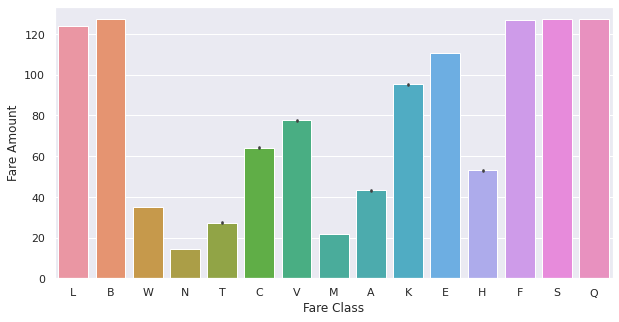

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x="Fare Class", y="Fare Amount", data=data)

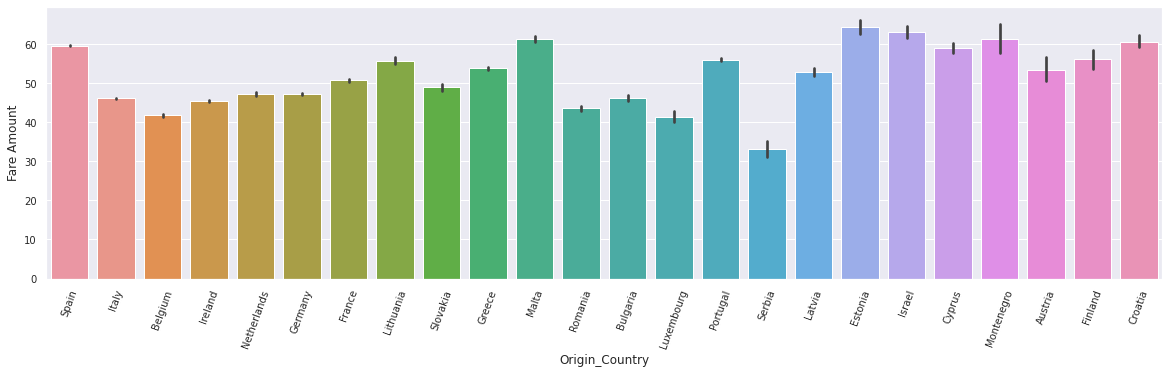

In [40]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.barplot(x="Origin_Country", y="Fare Amount",data=data)

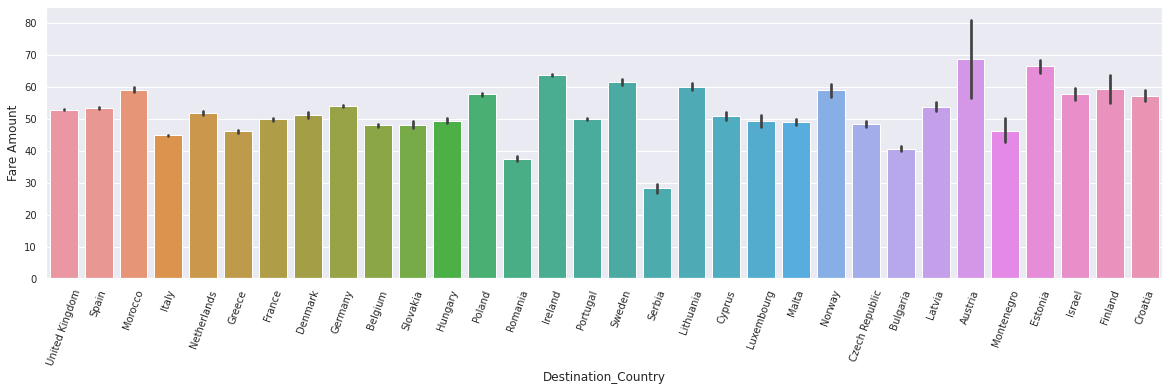

In [41]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.barplot(x="Destination_Country", y="Fare Amount",data=data)

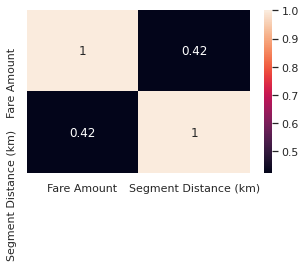

In [42]:
df1 = data[['Fare Amount', 'Segment Distance (km)']]
plot.figure(figsize=(5,3))
sns.heatmap(df1.corr(),annot=True)
plot.show()

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
      
vif_cal(input_data=df1.drop('Fare Amount',axis=1))

Segment Distance (km)  VIF =  1.0


In [44]:
data.groupby('Destination_Country')['Destination_City'].value_counts()

Destination_Country  Destination_City
Austria              Salzburg               33
Belgium              Charleroi           13303
                     Brussels             6624
Bulgaria             Sofia                2768
                     Bourgas               329
                                         ...  
United Kingdom       Bournemouth          1116
                     Belfast              1015
                     Aberdeen              327
                     Newquai               185
                     Cardiff               139
Name: Destination_City, Length: 186, dtype: int64

In [45]:
data.groupby('Origin_Country')['Destination_City'].value_counts()

Origin_Country  Destination_City              
Austria         London                             350
                Dublin                              33
Belgium         Barcelona                         1366
                Rome                              1152
                Dublin                            1001
                                                  ... 
Spain           Riga                                62
                Vaxjo                               62
                Pescara                             55
                Tallinn-ulemiste International      54
                Thessaloniki                        54
Name: Destination_City, Length: 990, dtype: int64

In [46]:
df2=data[data['Destination_City']=='London']
df3=df2[df2['Origin_City']=='Madrid']
len(df3)
#data.groupby('Origin_City','Destination_City')['Fare Amount'].value_counts()

1290

In [47]:
for i in df3['Fare Class'].unique():
    df3[df3['Fare Class'] == i].describe()


**MULTIVARIATE ANALYSIS**

<Figure size 360x360 with 0 Axes>

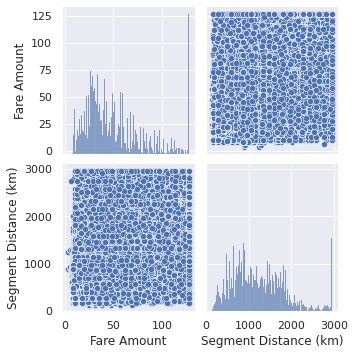

In [48]:
plt.figure(figsize=(5,5))
sns.pairplot(df1)

# **FEATURE ENGINEERING**

In [49]:
for column in data.columns:
    if data[column].dtype =='object':
        print(column.upper(),': ',data[column].nunique())
        #print(data[column].value_counts().sort_values())
        #print('\n')

BOOKING DATE :  1
ORIGIN_CITY :  148
ORIGIN_COUNTRY :  24
DESTINATION_CITY :  186
DESTINATION_COUNTRY :  32
FLIGHT DURATION :  95
DEPARTURE TIME :  424
ARRIVAL TIME :  436
FARE CLASS :  15


In [50]:
#Changing the booking date format from int64 to datetime 
data['Booking Date']=data['Booking Date'].astype('datetime64[ns]')

In [51]:
data['Date Diff']=(data['Date'] - data['Booking Date']).dt.days
data.drop(['Booking Date'],axis=1,inplace=True)
data.head(2)

,Date,Origin_City,Origin_Country,Destination_City,Destination_Country,Flight Duration,Departure Time,Arrival Time,Fare Class,Fare Amount,Fare Published,Segment Distance (km),Date Diff
53,2018-01-03,Malaga,Spain,Aberdeen,United Kingdom,03:35,06:45:00,09:20:00,L,127.09,126.49,2288.363401,237
54,2018-01-06,Malaga,Spain,Aberdeen,United Kingdom,03:35,15:30:00,18:05:00,B,127.09,126.49,2288.363401,240


In [52]:
import datetime as dt
data['Journey_month'] = data['Date'].dt.strftime('%B')
data['Journey_year'] = data['Date'].dt.strftime('%Y')
data['Journey_weekday'] = data['Date'].dt.strftime('%A')
data.drop(['Date'],axis=1,inplace=True)

In [53]:
#ading new column day type
data['Day_type'] = ['Holiday' if x ==['Saturday'] else 'Normal' for x in data['Journey_weekday']]
data.loc[data.Journey_weekday == "Sunday", "Day_type"] = "Holiday"
data.loc[data.Journey_weekday == "Saturday","Day_type"] = "Holiday"
data.head(2)

,Origin_City,Origin_Country,Destination_City,Destination_Country,Flight Duration,Departure Time,Arrival Time,Fare Class,Fare Amount,Fare Published,Segment Distance (km),Date Diff,Journey_month,Journey_year,Journey_weekday,Day_type
53,Malaga,Spain,Aberdeen,United Kingdom,03:35,06:45:00,09:20:00,L,127.09,126.49,2288.363401,237,January,2018,Wednesday,Normal
54,Malaga,Spain,Aberdeen,United Kingdom,03:35,15:30:00,18:05:00,B,127.09,126.49,2288.363401,240,January,2018,Saturday,Holiday


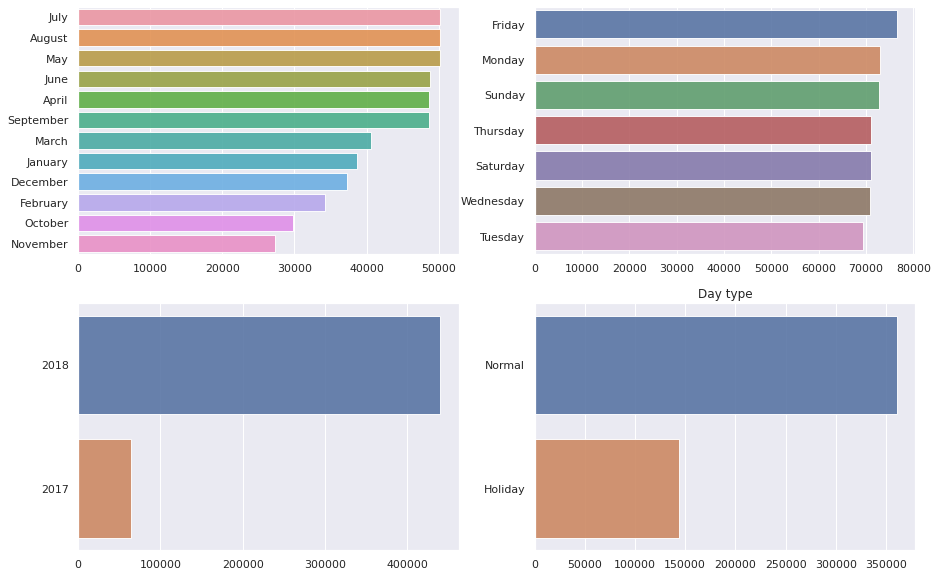

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
Journeymonth_count = data['Journey_month'].value_counts()
Journeyweekday_count = data['Journey_weekday'].value_counts()
Journeyyear_count = data['Journey_year'].value_counts()
daytype_count = data['Day_type'].value_counts()

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)

a =sns.barplot(Journeymonth_count.values,Journeymonth_count.index, alpha=0.9, ax=axes[0][0])
plt.title('Journey Month')

a =sns.barplot(Journeyweekday_count.values,Journeyweekday_count.index, alpha=0.9, ax=axes[0][1])
plt.title('Journey Weekday')

a =sns.barplot(Journeyyear_count.values,Journeyyear_count.index, alpha=0.9, ax=axes[1][0])
plt.title('Journey Year')

a =sns.barplot(daytype_count.values,daytype_count.index, alpha=0.9, ax=axes[1][1])
plt.title('Day type')

plt.show()

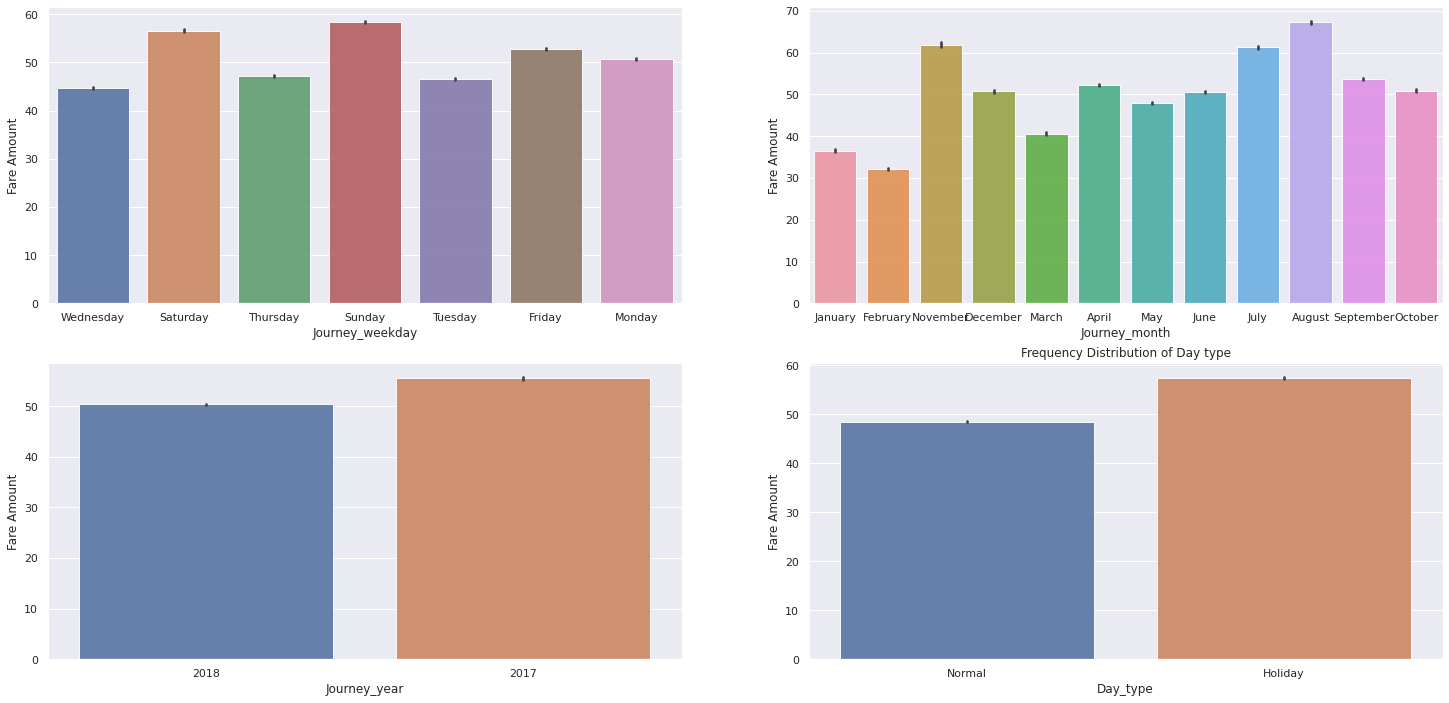

In [55]:
#sns.barplot(x="Destination_Country", y="Fare Amount",data=data)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,12)

a =sns.barplot(x="Journey_weekday", y="Fare Amount",data=data,alpha=0.9, ax=axes[0][0])
plt.title('Frequency Distribution of Journey Month')

a =sns.barplot(x="Journey_month", y="Fare Amount",data=data, alpha=0.9, ax=axes[0][1])
plt.title('Frequency Distribution of Journey Weekday')

a =sns.barplot(x="Journey_year", y="Fare Amount",data=data, alpha=0.9, ax=axes[1][0])
plt.title('Frequency Distribution of Journey Year')

a =sns.barplot(x="Day_type", y="Fare Amount",data=data,alpha=0.9, ax=axes[1][1])
plt.title('Frequency Distribution of Day type')

plt.show()

In [56]:
#Two Way Anova Test
import statsmodels.api as sm
from statsmodels.formula.api import ols
data.rename(columns={'Fare Amount':'Fare_Amount'},inplace=True)
formula2 = 'Fare_Amount ~ C(Day_type) + C(Journey_year) + C(Journey_month) + C(Journey_weekday) + C(Day_type):C(Journey_year) + C(Journey_month):C(Journey_weekday)+ C(Journey_month):C(Day_type) + C(Day_type):C(Journey_weekday) + C(Journey_month):C(Journey_year) + C(Journey_year):C(Journey_weekday)'
model2= ols(formula2, data).fit()
aov_table = sm.stats.anova_lm(model2,typ=2)
print(aov_table)

                                           sum_sq  ...    PR(>F)
C(Day_type)                          7.042919e-02  ...  0.992556
C(Journey_year)                     -5.705853e-04  ...  1.000000
C(Journey_month)                    -8.437703e-01  ...  1.000000
C(Journey_weekday)                   5.116648e+00  ...  0.999998
C(Day_type):C(Journey_year)          6.494959e+03  ...  0.004607
C(Journey_month):C(Journey_weekday)  4.294963e+05  ...  0.004568
C(Journey_month):C(Day_type)         7.114931e+04  ...  0.004692
C(Day_type):C(Journey_weekday)       1.283129e+04  ...  0.047491
C(Journey_month):C(Journey_year)     2.362909e+04  ...  0.046742
C(Journey_year):C(Journey_weekday)   3.860912e+04  ...  0.004800
Residual                             4.081978e+08  ...       NaN

[11 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 66, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraint

As we can see from the above Anova Test that the fare amount is affected  when there is interaction between the type of jouney year, month,weekday and day type. but individually each variable doesnot affect the fare amount.

SO these variables are important for our model building

In [57]:
data['Journey_year']=data['Journey_year'].astype('category')
data['Journey_year_cat']=data['Journey_year'].cat.codes
data=data.drop(['Journey_year'],axis=1)

In [58]:
data= pd.get_dummies(data,prefix=['Journey_month','Journey_weekday','Day_type'],columns=['Journey_month','Journey_weekday','Day_type'], drop_first=True)

In [59]:
data['Origin_Country'].nunique()
#(((data['Origin_Country'].value_counts())/len(data))*100).cumsum().head(4)

24

In [60]:
data["Origin_Country"].replace({'Poland':'others','Morocco':'others','Denmark':'others','Hungary':'others','Sweden':'others','Czech Republic':'others','Norway':'others',"Portugal":"others","France":"others","Belgium": "others", "Greece": "others","Netherlands":"others","Malta":"others","Romania":"others","Lithuania":"others","Bulgaria":"others","Slovakia":"others","Latvia":"others","Cyprus":"others","Israel":"others","Luxembourg":"others","Croatia":"others","Estonia":"others","Serbia":"others","Montenegro":"others","Austria":"others","Finland":"others"}, inplace=True)
data["Origin_Country"].replace({"thers": "others"}, inplace=True)


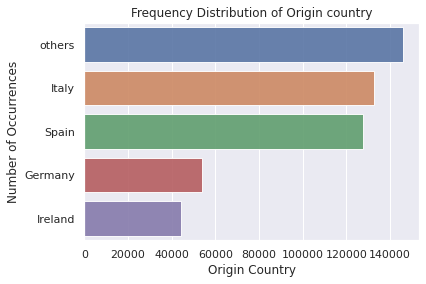

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
origincity_count = data['Origin_Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(origincity_count.values,origincity_count.index, alpha=0.9)
plt.title('Frequency Distribution of Origin country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Origin Country', fontsize=12)
plt.show()

In [62]:
(((data['Destination_Country'].value_counts())/len(data))*100).cumsum().head(4)

Italy             22.105762
United Kingdom    41.941634
Spain             58.770209
Germany           66.986520
Name: Destination_Country, dtype: float64

In [63]:
data['Destination_City'].nunique()

186

In [64]:
data["Destination_Country"].replace({"Belgium":"others","France":"others","Ireland":"others","Poland": "others", "Greece": "others","Netherlands":"others","Malta":"others","Romania":"others","Lithuania":"others","Bulgaria":"others","Slovakia":"others","Latvia":"others","Cyprus":"others","Israel":"others","Luxembourg":"others","Croatia":"others","Estonia":"others","Serbia":"others","Montenegro":"others","Austria":"others","Finland":"others"}, inplace=True)
data["Destination_Country"].replace({"Portugal":"others","Morocco": "others", "Hungary": "others","Denmark":"others","Sweden":"others","Czech Republic":"others","Norway":"others"}, inplace=True)


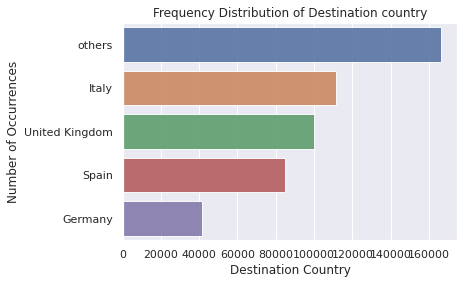

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
destinationcountry_count = data['Destination_Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(destinationcountry_count.values,destinationcountry_count.index, alpha=0.9)
plt.title('Frequency Distribution of Destination country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Destination Country', fontsize=12)
plt.show()

In [66]:
(((data['Fare Class'].value_counts())/len(data))*100).cumsum().head(7)
#print(((data['Fare Class'].value_counts())/len(data))*100).cumsum().head(4)))
#print((((data['Fare Class'].value_counts().nlargest(7).sum())/len(data))*100))

T    18.801005
W    32.410039
A    44.560310
H    56.105952
C    66.482761
N    75.953913
V    83.687867
Name: Fare Class, dtype: float64

In [67]:
data['Fare Class'].replace({'B':'others','E':'others','F':'others','K':'others','M':'others','L':'others','S':'others','Q':'others'},inplace=True)

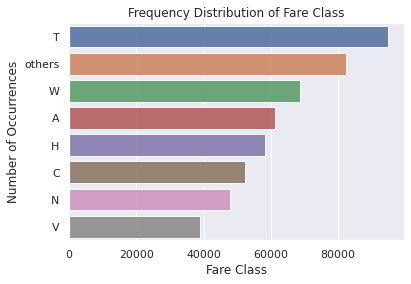

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
FareClass_count = data['Fare Class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(FareClass_count.values,FareClass_count.index, alpha=0.9)
plt.title('Frequency Distribution of Fare Class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fare Class', fontsize=12)
plt.show()

In [69]:
data['Departure Time']=data['Departure Time'].astype('str')
data['Arrival Time']=data['Arrival Time'].astype('str')

import datetime as dt
data['Departuretimeformat']=pd.to_datetime(data['Departure Time'])
data['Arrivaltimeformat']=pd.to_datetime(data['Arrival Time'])

In [70]:
data['Departuretime_Hr'] = data['Departuretimeformat'].dt.strftime('%H')
data['Arrivaltime_Hr'] = data['Arrivaltimeformat'].dt.strftime('%H')

data.drop(['Departure Time','Arrival Time','Departuretimeformat','Arrivaltimeformat'],axis=1,inplace=True)
data.head(2)

,Origin_City,Origin_Country,Destination_City,Destination_Country,Flight Duration,Fare Class,Fare_Amount,Fare Published,Segment Distance (km),Date Diff,Journey_year_cat,Journey_month_August,Journey_month_December,Journey_month_February,Journey_month_January,Journey_month_July,Journey_month_June,Journey_month_March,Journey_month_May,Journey_month_November,Journey_month_October,Journey_month_September,Journey_weekday_Monday,Journey_weekday_Saturday,Journey_weekday_Sunday,Journey_weekday_Thursday,Journey_weekday_Tuesday,Journey_weekday_Wednesday,Day_type_Normal,Departuretime_Hr,Arrivaltime_Hr
53,Malaga,Spain,Aberdeen,United Kingdom,03:35,others,127.09,126.49,2288.363401,237,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,06,09
54,Malaga,Spain,Aberdeen,United Kingdom,03:35,others,127.09,126.49,2288.363401,240,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,18


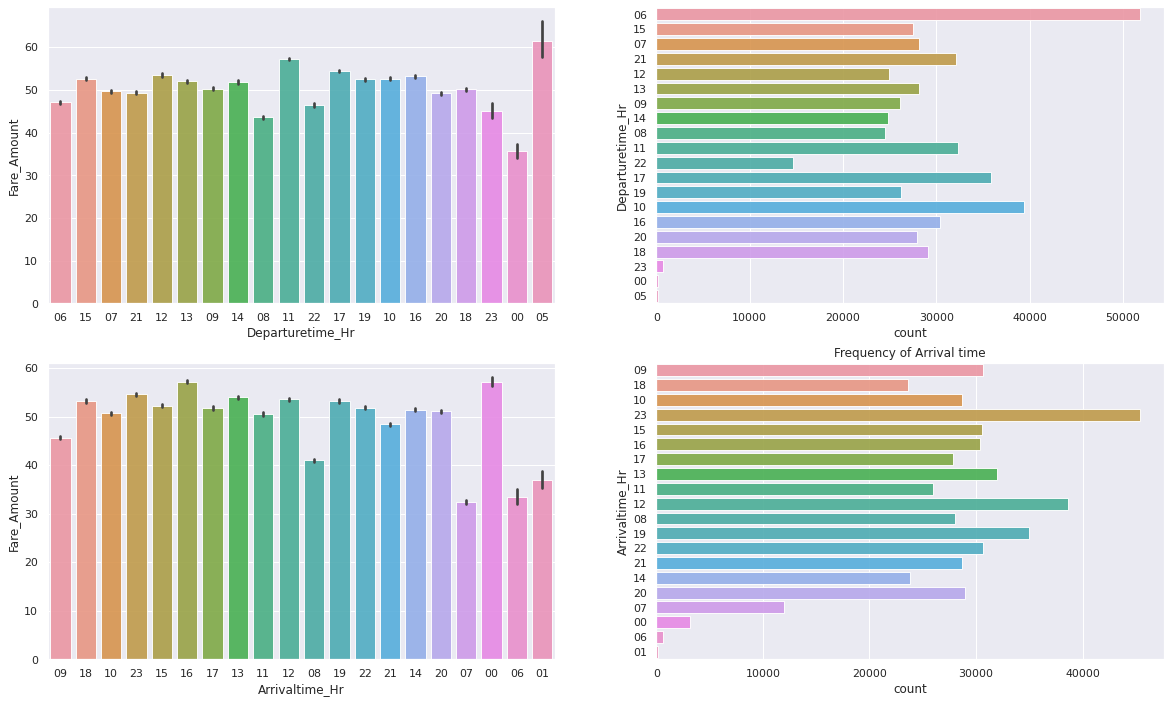

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,12)

a =sns.barplot(x="Departuretime_Hr", y="Fare_Amount",data=data,alpha=0.9, ax=axes[0][0])
plt.title('Frequency Distribution of Departure Time')

a =sns.countplot(y="Departuretime_Hr",data=data, alpha=0.9, ax=axes[0][1])
plt.title('Frequency of Departure time')

a =sns.barplot(x="Arrivaltime_Hr", y="Fare_Amount",data=data,alpha=0.9, ax=axes[1][0])
plt.title('Frequency Distribution of Arrival time')

a =sns.countplot(y="Arrivaltime_Hr",data=data, alpha=0.9, ax=axes[1][1])
plt.title('Frequency of Arrival time')



plt.show()

In [72]:
data['Flight Duration']=data['Flight Duration'].astype('str')

In [73]:
import datetime as dt
data['FlightdurationTimeFormat']=pd.to_datetime(data['Flight Duration'])

In [74]:
data['Flight Duration_Min'] = data['FlightdurationTimeFormat'].dt.strftime('%M')
data['Flight Duration_Hr'] = data['FlightdurationTimeFormat'].dt.strftime('%H')
data['Duration_in_minutes']=((pd.to_numeric(data['Flight Duration_Hr'])) *60) + (pd.to_numeric(data['Flight Duration_Min']))
data.drop(['Flight Duration_Hr','Flight Duration_Min','FlightdurationTimeFormat','Flight Duration'],axis=1,inplace=True)

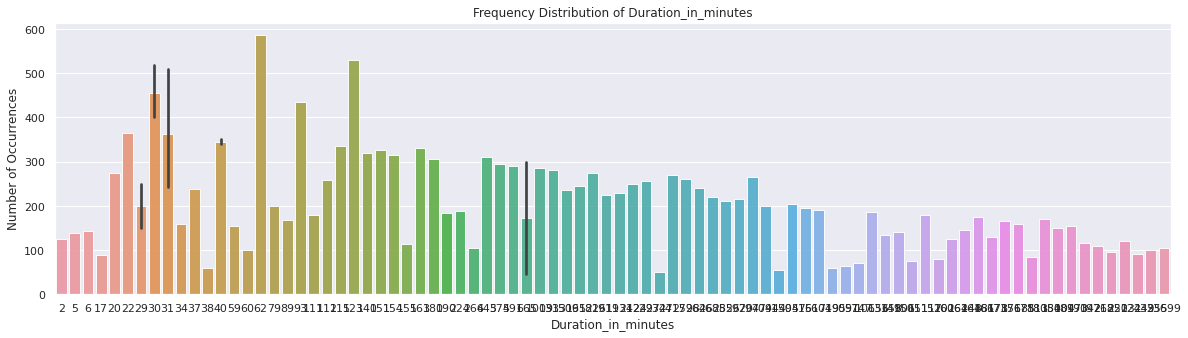

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
FareClass_count = data['Duration_in_minutes'].value_counts()
sns.set(style="darkgrid")
sns.barplot(FareClass_count.values,FareClass_count.index, alpha=0.9)
plt.title('Frequency Distribution of Duration_in_minutes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Duration_in_minutes', fontsize=12)
plt.show()

In [76]:
#pd.options.display.max_rows=None
(((data['Origin_City'].value_counts())/len(data))*100).cumsum().head(30)
#print(data['Origin_City'].value_counts().head(30))

Dublin                7.357622
Bergamo              13.006385
Rome                 17.552903
Barcelona            21.821381
Madrid               25.571634
Charleroi            29.056333
Berlin               31.716230
Palma de Mallorca    34.125436
Malaga               36.491639
Porto                38.782932
Alicante             40.918657
Bologna              42.945585
Lisbon               44.742631
Beauvais             46.439598
Pisa                 48.111596
Valencia             49.711458
Eindhoven            51.303988
Treviso              52.863224
Palermo              54.417902
Catania              55.969212
Frankfurt            57.508234
Athens               59.040519
Cologne              60.451917
Tenerife             61.847858
Malta                63.230322
Faro                 64.583854
Brussels             65.897948
Sevilla              67.153383
Hahn                 68.339061
Bari                 69.512253
Name: Origin_City, dtype: float64

In [77]:
data["Origin_City"].replace({"Almeria":'others',"Palanga":"others",'Strasbourg':'others','Clermont-Ferrand':'others','Cuneo':'others','Poitiers':'others','Grenoble':'others','Chalons':'others','Leipzig':'others','Parma':'others','Rijeka':'others','Tampere':'others','Larnaca':'others','Lorient':'others','Varna':'others','Linz':'others','Craiova':'others','Rodez':'others','Brive':'others','Deauville':'others','Lappeenranta': 'others','Milano':'others','Naples':'others','Marseille':'others','Ibiza':'others','Weeze':'others','Bucharest':'others','Arrecife':'others','Cagliari':'others','Thessaloniki':'others','Gerona':'others','Gran Canaria':'others','Brindisi':'others','Bratislava':'others','Vilnius':'others','Santiago':'others','Toulouse':'others','Riga':'others','Hamburg':'others','Nuernberg':'others','Torino':'others','Karlsruhe/Baden-Baden':'others','Cork':'others','Memmingen':'others','Fuerteventura':'others','Bremen':'others','Shannon':'others','Chania':'others','Paphos':'others','Murcia':'others','Santander':'others','Kaunas':'others','Connaught':'others','Amsterdam':'others','Timisoara':'others','Luxemburg':'others','Pescara':'others','Tel-aviv':'others','Villafranca':'others','Bordeaux':'others','Alghero':'others','Comiso':'others','Carcassonne':'others','Ponta Delgada':'others','Kerkyra/corfu':'others','Dortmund':'others','Reus':'others','Zadar':'others','Kerry':'others','Rhodos':'others','Ronchi De Legionari':'others','Beziers':'others','Munich':'others','Tallinn-ulemiste International':'others','Thira':'others','Nantes':'others','Nimes':'others','Limoges':'others','Venice':'others','Nice':'others','Vigo':'others','Zaragoza':'others','Oradea':'others','Stuttgart':'others','Biarritz-bayonne':'others','Tours':'others','Perugia':'others','Perpignan':'others','Ovda':'others','Jerez':'others','Nis':'others','Ancona':'others','Plovdiv':'others','Bergerac':'others','Bourgas':'others','Valladolid':'others','Genoa':'others','Podgorica':'others','Vitoria':'others','Lille':'others','La Rochelle':'others','Trapani':'others','Tarbes':'others','Menorca':'others','CastellÃ³n de la Plana':'others','Brest':'others','Dinard':'others','Lajes (terceira Island)':'others','Salzburg':'others','Dole':'others','Maastricht':'others','Mykonos':'others','Pula':'others','Montpellier':'others','Figari':'others','Keffallinia':'others'},inplace=True)
data['Origin_City'].replace({'Lamezia':'others','Sofia':'others'},inplace=True)
data['Origin_City'].replace({'others':'origincity(others)'},inplace=True)
data['Origin_City'].replace({'othersoricity':'origincity(others)'},inplace=True)
data['Origin_City'].replace({'East Midlands':'origincity(others)','Birmingham':'origincity(others)','Liverpool':'origincity(others)','Copenhagen':'origincity(others)','Bristol':'origincity(others)','Stockholm':'origincity(others)','Marrakech':'origincity(others)','Glasgow':'origincity(others)','Prague':'origincity(others)','Wroclaw':'origincity(others)','Leeds':'origincity(others)','Gdansk':'origincity(others)','Belfast':'origincity(others)','Sandefjord':'origincity(others)','Newcastle':'origincity(others)','Prestwick':'origincity(others)','Fes':'origincity(others)','Billund':'origincity(others)','Poznan':'origincity(others)','Gothenborg':'origincity(others)','Oslo':'origincity(others)','Rzeszow':'origincity(others)','Bournemouth':'origincity(others)','Rabat':'origincity(others)','Katowice':'origincity(others)','Szczecin':'origincity(others)','Bydgoszcz':'origincity(others)','Tanger':'origincity(others)','El Aroui':'origincity(others)','Lodz':'origincity(others)','Mulhouse':'origincity(others)','Aarhus':'origincity(others)','Londonderry':'origincity(others)','Oujda':'origincity(others)','Agadir':'origincity(others)','Vasteras':'origincity(others)','Aberdeen':'origincity(others)','Brno':'origincity(others)','Ostrava':'origincity(others)','Vaxjo':'origincity(others)','Aalborg':'origincity(others)','Newquai':'origincity(others)','Szczytno-Szymany':'origincity(others)','Malmoe':'origincity(others)','Pardubice':'origincity(others)','Cardiff':'origincity(others)','Haugesund':'origincity(others)'},inplace=True)

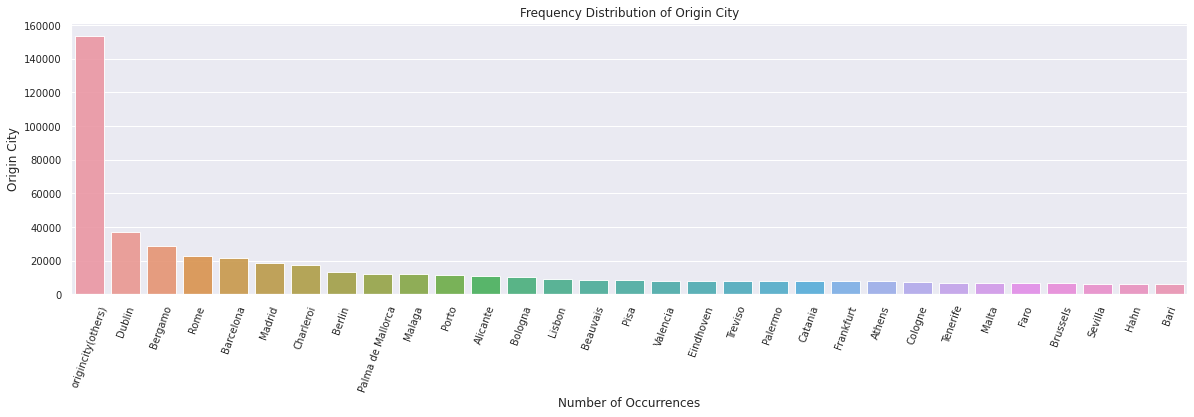

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
origincity_count = data['Origin_City'].value_counts()
sns.set(style="darkgrid")
sns.barplot(origincity_count.index,origincity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Origin City')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Origin City', fontsize=12)
plt.show()

In [79]:
(((data['Destination_City'].value_counts())/len(data))*100).cumsum().head(30)
#print((((data['Destination_City'].value_counts().nlargest(30).sum())/len(data))*100))
#print(data['Destination_City'].value_counts().head(30))

London                9.870275
Bergamo              14.393408
Rome                 18.050320
Dublin               21.505095
Barcelona            24.666770
Madrid               27.510771
Charleroi            30.147085
Manchester           32.408057
Berlin               34.448064
Porto                36.462904
Bologna              38.162844
Palma de Mallorca    39.764093
Catania              41.325708
Palermo              42.789027
Lisbon               44.218460
Valencia             45.558911
Beauvais             46.895003
Brussels             48.207711
Pisa                 49.494655
Athens               50.720760
Frankfurt            51.925264
Edinburgh            53.126598
Treviso              54.324562
East Midlands        55.521536
Eindhoven            56.702853
Malaga               57.824322
Bari                 58.921614
Krakow               60.011970
Birmingham           61.081715
Sevilla              62.141750
Name: Destination_City, dtype: float64

In [80]:
data['Destination_City'].replace({'Hahn':'othersdestcity','Milano':'othersdestcity','Liverpool':'othersdestcity','Naples':'othersdestcity','Ibiza':'othersdestcity','Malta':'othersdestcity','Bristol':'othersdestcity','Bucharest':'othersdestcity','Cagliari':'othersdestcity','Weeze':'othersdestcity','Marseille':'othersdestcity','Thessaloniki':'othersdestcity','Marrakech':'othersdestcity','Copenhagen':'othersdestcity','Hamburg':'othersdestcity','Faro':'othersdestcity','Lamezia':'othersdestcity','Brindisi':'othersdestcity','Leeds':'othersdestcity','Glasgow':'othersdestcity','Santiago':'othersdestcity','Sofia':'othersdestcity','Stockholm':'othersdestcity','Prague':'othersdestcity','Gran Canaria':'othersdestcity','Gerona':'othersdestcity','Arrecife':'othersdestcity','Torino':'othersdestcity','Wroclaw':'othersdestcity','Bratislava':'othersdestcity','Toulouse':'othersdestcity','Prestwick':'othersdestcity','Fes':'othersdestcity','Newcastle':'othersdestcity','Vilnius':'othersdestcity','Karlsruhe/Baden-Baden':'othersdestcity','Amsterdam':'othersdestcity','Memmingen':'othersdestcity','Riga':'othersdestcity','Chania':'othersdestcity','Bremen':'othersdestcity','Paphos':'othersdestcity','Nuernberg':'othersdestcity','Santander':'othersdestcity','Fuerteventura':'othersdestcity','Timisoara':'othersdestcity','Pescara':'othersdestcity','Alghero':'othersdestcity','Bournemouth':'othersdestcity','Luxemburg':'othersdestcity','Comiso':'othersdestcity','Billund':'othersdestcity','Tel-aviv':'othersdestcity','Belfast':'othersdestcity','Ponta Delgada':'othersdestcity','Villafranca':'othersdestcity','Rabat':'othersdestcity','Gdansk':'othersdestcity','Bordeaux':'othersdestcity','Poznan':'othersdestcity','Tanger':'othersdestcity','Gothenborg':'othersdestcity','El Aroui':'othersdestcity','Thira':'othersdestcity','Munich':'othersdestcity','Rhodos':'othersdestcity','Zadar':'othersdestcity','Shannon':'othersdestcity','Kaunas':'othersdestcity','Reus':'othersdestcity','Cork':'othersdestcity','Sandefjord':'othersdestcity','Carcassonne':'othersdestcity','Ronchi De Legionari':'othersdestcity','Vigo':'othersdestcity','Tallinn-ulemiste International':'othersdestcity','Katowice':'othersdestcity','Venice':'othersdestcity','Nantes':'othersdestcity','Kerkyra/corfu':'othersdestcity','Oradea':'othersdestcity','Murcia':'othersdestcity','Dortmund':'othersdestcity','Valladolid':'othersdestcity','Nis':'othersdestcity','Vitoria':'othersdestcity','Oujda':'othersdestcity','Oslo':'othersdestcity','Lille':'othersdestcity','Jerez':'othersdestcity','Zaragoza':'othersdestcity','Trapani':'othersdestcity','Stuttgart':'othersdestcity','Bourgas':'othersdestcity','Aberdeen':'othersdestcity','Kerry':'othersdestcity','Ovda':'othersdestcity','Brest':'othersdestcity','Lajes (terceira Island)':'othersdestcity','Plovdiv':'othersdestcity','Menorca':'othersdestcity','Nice':'othersdestcity','Tours':'othersdestcity','Perugia':'othersdestcity','Maastricht':'othersdestcity','Mykonos':'othersdestcity','Agadir':'othersdestcity','Rzeszow':'othersdestcity','Montpellier':'othersdestcity','Beziers':'othersdestcity','Nimes':'othersdestcity','Biarritz-bayonne':'othersdestcity','Connaught':'othersdestcity','Podgorica':'othersdestcity','Perpignan':'othersdestcity','Ancona':'othersdestcity','Pula':'othersdestcity','Newquai':'othersdestcity','Figari':'othersdestcity','La Rochelle':'othersdestcity','Bydgoszcz':'othersdestcity','Mulhouse':'othersdestcity','Cuneo':'othersdestcity','Genoa':'othersdestcity','Cardiff':'othersdestcity','Parma':'othersdestcity','Lodz':'othersdestcity','Dole':'othersdestcity','Haugesund':'othersdestcity','Vasteras':'othersdestcity','Almeria':'othersdestcity','Tarbes':'othersdestcity','Vaxjo':'othersdestcity','Keffallinia':'othersdestcity','Szczecin':'othersdestcity','Ostrava':'othersdestcity','Larnaca':'othersdestcity','Lorient':'othersdestcity','Clermont-Ferrand':'othersdestcity','Strasbourg':'othersdestcity','Chalons':'othersdestcity','Varna':'othersdestcity','Craiova':'othersdestcity','CastellÃ³n de la Plana':'othersdestcity','Rijeka':'othersdestcity','Bergerac':'othersdestcity','Rodez':'othersdestcity','Tampere':'othersdestcity','Salzburg':'othersdestcity','Lappeenranta':'othersdestcity','Grenoble':'othersdestcity'},inplace=True)
data['Destination_City'].replace({'Liverpool':'origincity(others)','Copenhagen':'origincity(others)','Bristol':'origincity(others)','Stockholm':'origincity(others)','Marrakech':'origincity(others)','Glasgow':'origincity(others)','Prague':'origincity(others)','Wroclaw':'origincity(others)','Leeds':'origincity(others)','Gdansk':'origincity(others)','Belfast':'origincity(others)','Sandefjord':'origincity(others)','Newcastle':'origincity(others)','Prestwick':'origincity(others)','Fes':'origincity(others)','Billund':'origincity(others)','Poznan':'origincity(others)','Gothenborg':'origincity(others)','Oslo':'origincity(others)','Rzeszow':'origincity(others)','Bournemouth':'origincity(others)','Rabat':'origincity(others)','Katowice':'origincity(others)','Szczecin':'origincity(others)','Bydgoszcz':'origincity(others)','Tanger':'origincity(others)','El Aroui':'origincity(others)','Lodz':'origincity(others)','Mulhouse':'origincity(others)','Aarhus':'origincity(others)','Londonderry':'origincity(others)','Oujda':'origincity(others)','Agadir':'origincity(others)','Vasteras':'origincity(others)','Aberdeen':'origincity(others)','Brno':'origincity(others)','Ostrava':'origincity(others)','Vaxjo':'origincity(others)','Aalborg':'origincity(others)','Newquai':'origincity(others)','Szczytno-Szymany':'origincity(others)','Malmoe':'origincity(others)','Pardubice':'origincity(others)','Cardiff':'origincity(others)','Haugesund':'origincity(others)'},inplace=True)
data['Destination_City'].replace({'Warsaw':'Destcity(others)','Cologne':'Destcity(others)','Tenerife':'Destcity(others)','Alicante':'Descity(others)','Budapest':'Destcity(others)','origincity(others)':'Destcity(others)'},inplace=True)
data['Destination_City'].replace({'Limoges':'Destcity(others)','Dinard':'Destcity(others)','Desrcity(others)':'Destcity(others)','Palanga':'Destcity(others)','Poitiers':'Destcity(others)','Leipzig':'Destcity(others)','Linz':'Destcity(others)','Brive':'Destcity(others)','Deauville':'Destcity(others)','othersdestcity':'Destcity(others)'},inplace=True)

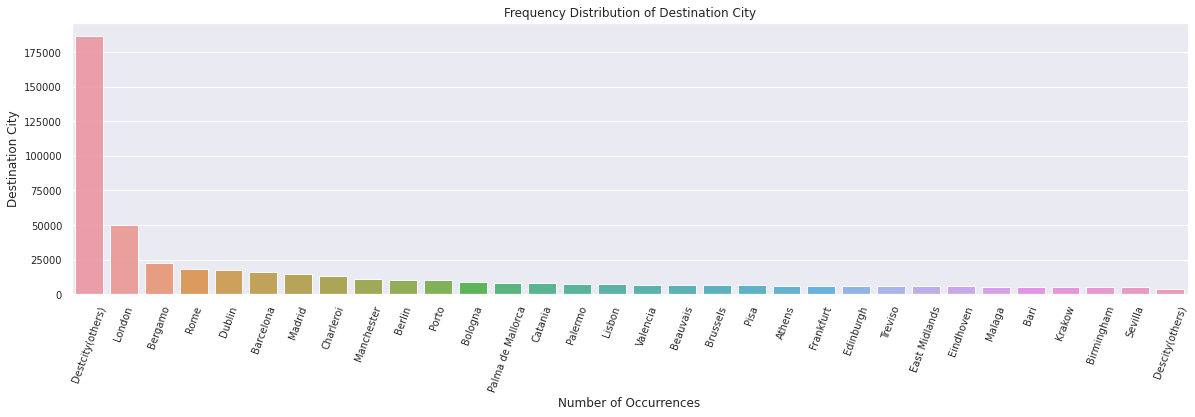

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
destinationcity_count = data['Destination_City'].value_counts()
sns.set(style="darkgrid")
sns.barplot(destinationcity_count.index,destinationcity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Destination City')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Destination City', fontsize=12)
plt.show()

**INFERENTIAL ANALYSIS**

In [82]:
from scipy.stats import shapiro,levene,mannwhitneyu,wilcoxon
from scipy.stats import shapiro,levene,ttest_ind,ttest_1samp,wilcoxon,mannwhitneyu
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats.mstats import kruskalwallis
from scipy import stats

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504606 entries, 53 to 725753
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Origin_City                504606 non-null  object 
 1   Origin_Country             504606 non-null  object 
 2   Destination_City           504606 non-null  object 
 3   Destination_Country        504606 non-null  object 
 4   Fare Class                 504606 non-null  object 
 5   Fare_Amount                504606 non-null  float64
 6   Fare Published             504606 non-null  float64
 7   Segment Distance (km)      504606 non-null  float64
 8   Date Diff                  504606 non-null  int64  
 9   Journey_year_cat           504606 non-null  int8   
 10  Journey_month_August       504606 non-null  uint8  
 11  Journey_month_December     504606 non-null  uint8  
 12  Journey_month_February     504606 non-null  uint8  
 13  Journey_month_January      5

# ***TWO WAY ANOVA***

> For Analyising the sample mean/ variance of the classes in the independent categorical variables with respect to continuous dependent variable



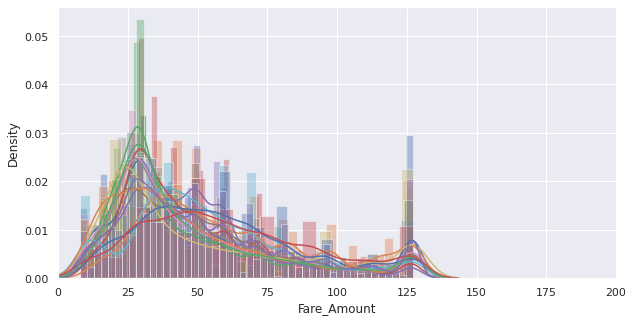

In [84]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Destination_City"] == 'London']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Dublin']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Bergamo']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Rome']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Barcelona']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Madrid']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Charleroi']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Berlin']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Manchester']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Palma de Mallorca']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Malaga']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Porto']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Bologna']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Krakow']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_City"] == 'Destcity(others)']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

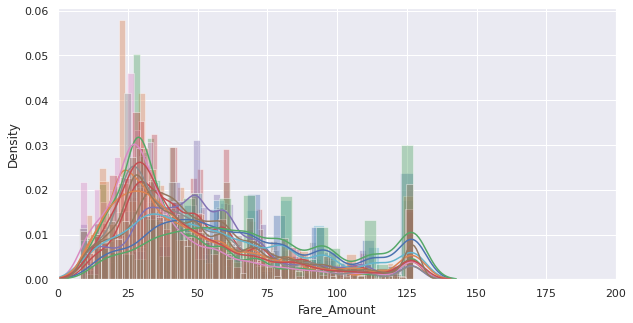

In [85]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Origin_City"] == 'London']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Dublin']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Bergamo']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Rome']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Barcelona']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Madrid']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Charleroi']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Berlin']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Manchester']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Palma de Mallorca']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Malaga']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Porto']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Alicante']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Bologna']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'Krakow']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_City"] == 'origincity(others)']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

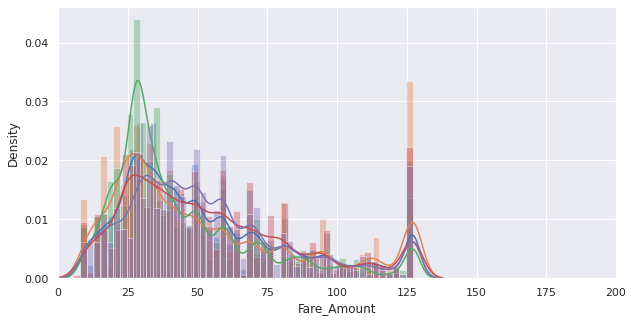

In [86]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Destination_Country"] == 'others']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_Country"] == 'United Kingdom']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_Country"] == 'Italy']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_Country"] == 'Germany']["Fare_Amount"])
sns.distplot(data.loc[data["Destination_Country"] == 'Spain']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

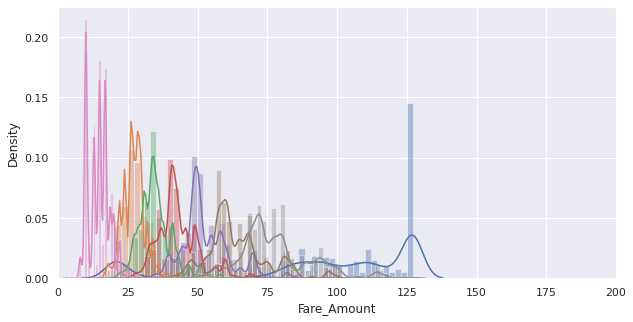

In [87]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Fare Class"] == 'others']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'T']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'W']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'A']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'H']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'C']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'N']["Fare_Amount"])
sns.distplot(data.loc[data["Fare Class"] == 'V']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

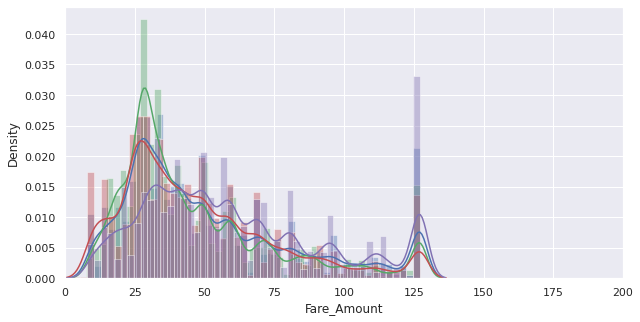

In [88]:
plt.figure(figsize=(10,5))
sns.distplot(data.loc[data["Origin_Country"] == 'others']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_Country"] == 'United Kingdom']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_Country"] == 'Italy']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_Country"] == 'Germany']["Fare_Amount"])
sns.distplot(data.loc[data["Origin_Country"] == 'Spain']["Fare_Amount"])
plt.xlim([0, 200])
plt.show()

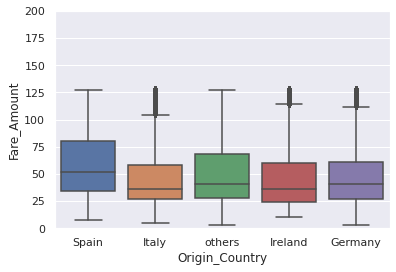

In [89]:
sns.boxplot(data['Origin_Country'],data["Fare_Amount"])
plt.ylim([0, 200])
plt.show()

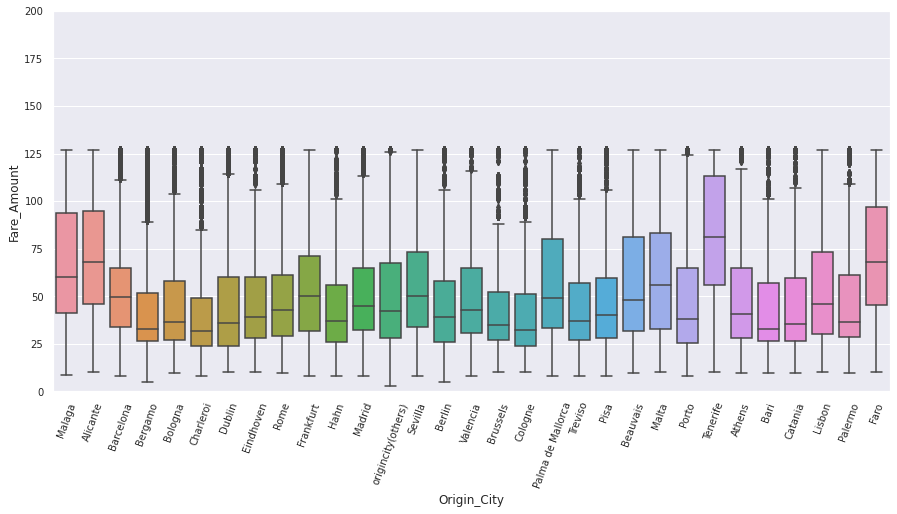

In [90]:
plt.figure(figsize=(15,7))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.boxplot(data['Origin_City'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

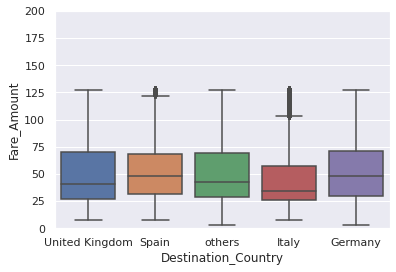

In [91]:
sns.boxplot(data['Destination_Country'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

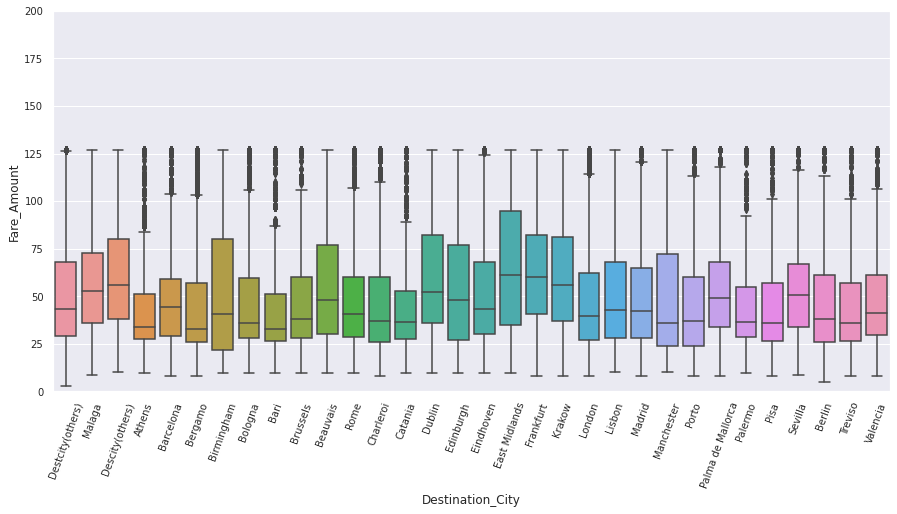

In [92]:
plt.figure(figsize=(15,7))
plt.tick_params(labelsize=10)
plt.xticks(rotation=70)
sns.boxplot(data['Destination_City'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

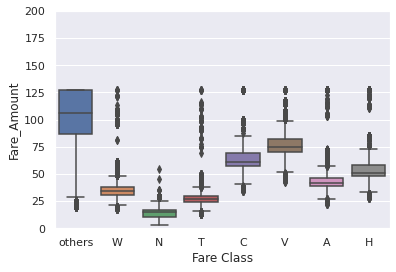

In [93]:
sns.boxplot(data['Fare Class'],data['Fare_Amount'])
plt.ylim([0, 200])

plt.show()

In [94]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
## For changing all object datatype to category for anova test

#for col in data.drop("Service Time",axis=1).columns:
    #data[col] = data[col].astype('category',copy=False)

##Replace Fare Published With Fare_Published (space with '_') as some of the formula will not recognize space in columns

#data.rename(columns={'Fare Amount':'Fare_Amount'},inplace=True)
data.rename(columns={'Fare Class':'Fare_Class'},inplace=True)
data.rename(columns={'Fare Currency':'Fare_Currency'},inplace=True)

# Anova test with interaction
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula1 = 'Fare_Amount ~ C(Destination_City) + C(Fare_Class) + C(Origin_City) + C(Origin_Country) + C(Destination_City)+ C(Destination_Country)'
model = ols(formula1,data).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
print(aov_table)

                              sum_sq        df              F  PR(>F)
C(Destination_City)     3.577838e+06      31.0     488.274412     0.0
C(Fare_Class)           3.112872e+08       7.0  188134.430291     0.0
C(Origin_City)          3.818300e+06      30.0     538.460529     0.0
C(Origin_Country)       1.104434e+06       4.0    1168.113269     0.0
C(Destination_Country)  1.051804e+06       4.0    1112.448546     0.0
Residual                1.192562e+08  504529.0            NaN     NaN


From the above ANOVA test wecan find that all the P values are < 0.05 so we reject H0 - that  is the population mean are not same for all categorical variables with respect to Fare Published . That is the variables affect the target variable  individually and also during interaction, so each variable affect the increase or decrease in the fare amount, so all variables are important


In [95]:
data= pd.get_dummies(data,prefix=['Origin_City','Destination_City','Fare_Class','Origin_Country','Destination_Country'],columns=['Origin_City','Destination_City','Fare_Class','Origin_Country','Destination_Country'], drop_first=True)

data.head(2)

,Fare_Amount,Fare Published,Segment Distance (km),Date Diff,Journey_year_cat,Journey_month_August,Journey_month_December,Journey_month_February,Journey_month_January,Journey_month_July,Journey_month_June,Journey_month_March,Journey_month_May,Journey_month_November,Journey_month_October,Journey_month_September,Journey_weekday_Monday,Journey_weekday_Saturday,Journey_weekday_Sunday,Journey_weekday_Thursday,Journey_weekday_Tuesday,Journey_weekday_Wednesday,Day_type_Normal,Departuretime_Hr,Arrivaltime_Hr,Duration_in_minutes,Origin_City_Athens,Origin_City_Barcelona,Origin_City_Bari,Origin_City_Beauvais,Origin_City_Bergamo,Origin_City_Berlin,Origin_City_Bologna,Origin_City_Brussels,Origin_City_Catania,Origin_City_Charleroi,Origin_City_Cologne,Origin_City_Dublin,Origin_City_Eindhoven,Origin_City_Faro,Origin_City_Frankfurt,Origin_City_Hahn,Origin_City_Lisbon,Origin_City_Madrid,Origin_City_Malaga,Origin_City_Malta,Origin_City_Palermo,Origin_City_Palma de Mallorca,Origin_City_Pisa,Origin_City_Porto,Origin_City_Rome,Origin_City_Sevilla,Origin_City_Tenerife,Origin_City_Treviso,Origin_City_Valencia,Origin_City_origincity(others),Destination_City_Barcelona,Destination_City_Bari,Destination_City_Beauvais,Destination_City_Bergamo,Destination_City_Berlin,Destination_City_Birmingham,Destination_City_Bologna,Destination_City_Brussels,Destination_City_Catania,Destination_City_Charleroi,Destination_City_Descity(others),Destination_City_Destcity(others),Destination_City_Dublin,Destination_City_East Midlands,Destination_City_Edinburgh,Destination_City_Eindhoven,Destination_City_Frankfurt,Destination_City_Krakow,Destination_City_Lisbon,Destination_City_London,Destination_City_Madrid,Destination_City_Malaga,Destination_City_Manchester,Destination_City_Palermo,Destination_City_Palma de Mallorca,Destination_City_Pisa,Destination_City_Porto,Destination_City_Rome,Destination_City_Sevilla,Destination_City_Treviso,Destination_City_Valencia,Fare_Class_C,Fare_Class_H,Fare_Class_N,Fare_Class_T,Fare_Class_V,Fare_Class_W,Fare_Class_others,Origin_Country_Ireland,Origin_Country_Italy,Origin_Country_Spain,Origin_Country_others,Destination_Country_Italy,Destination_Country_Spain,Destination_Country_United Kingdom,Destination_Country_others
53,127.09,126.49,2288.363401,237,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,06,09,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
54,127.09,126.49,2288.363401,240,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,18,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504606 entries, 53 to 725753
Columns: 102 entries, Fare_Amount to Destination_Country_others
dtypes: float64(3), int64(2), int8(1), object(2), uint8(94)
memory usage: 96.5+ MB


In [97]:
data.shape #final data fro modelling

(504606, 102)

#To Download the transformed file to the google drive 
1.data.to_csv("data.csv",index=False)
2.ls
3.cat data.csv
4.! zip data.zip *.csv